# PHYS591000 in 2022
# Lab 12
---
## Introduction 
In lab 12, we will practice AE.  
* Build a AutoEncoder(AE)
* Learn AE structure
* Dimensionality reduction and reconstruction of neural images.  

> **Useful Reference**
> 1. [AE Introduction](https://medium.com/ml-note/autoencoder-%E4%B8%80-%E8%AA%8D%E8%AD%98%E8%88%87%E7%90%86%E8%A7%A3-725854ab25e8)
> 2. [AE in wiki](https://en.wikipedia.org/wiki/Autoencoder)

---
## Data Introduction  
[FlyCircuit](http://www.flycircuit.tw/)  
* Format: pickle file
* Each neuron has three kinds of wieghts.  
* Each weight has three 16x16 figures for three views.  
---

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

import os
for dirname in os.listdir('/kaggle/input/phys591000-2022-week12-1/'):
    print(dirname,"/")
    for filename in os.listdir('/kaggle/input/phys591000-2022-week12-1/'+ dirname):
        print(filename)
        break
    print("\n")
    
    
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

fc_data /
VGlut-F-600169.pkl




## Lab 12
---

### 1.1 Visualize the dataset  
* Load the file of `5-HT1B-F-000000`.  
* Plot out the figure in it.  
`Note: There are 9 figures and each is 64x64.`

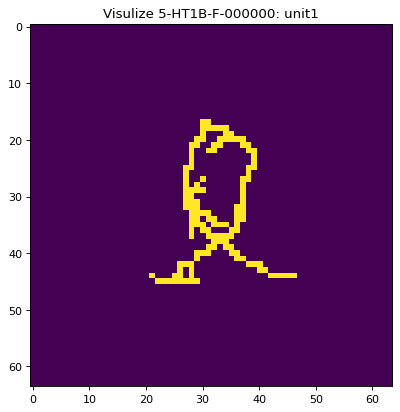

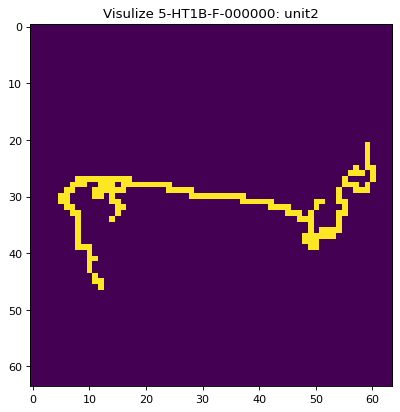

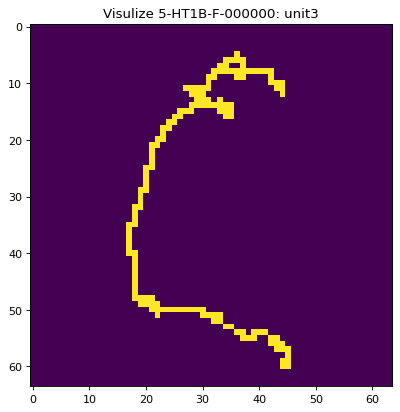

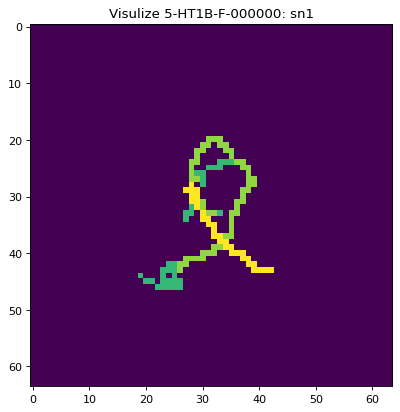

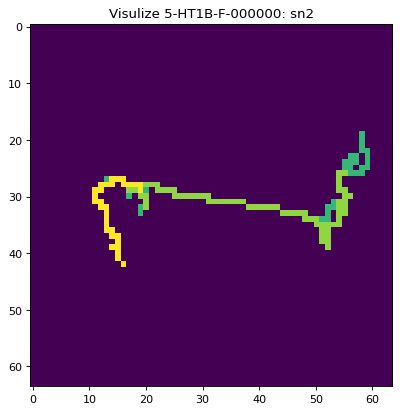

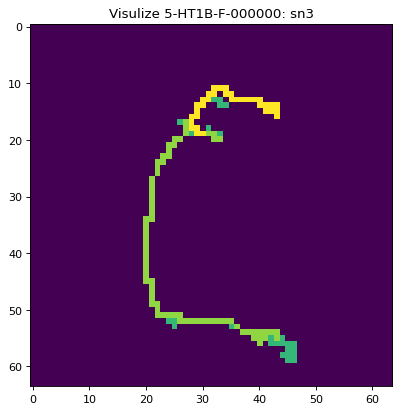

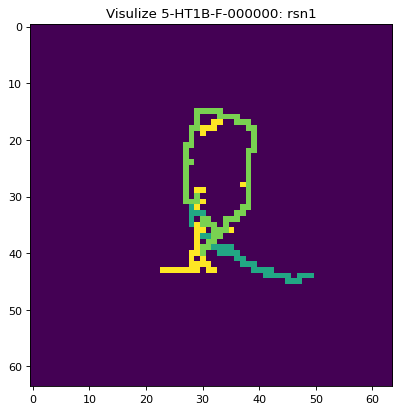

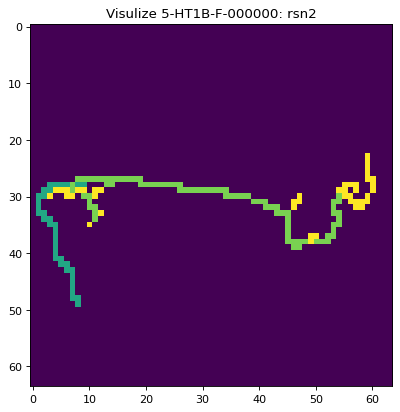

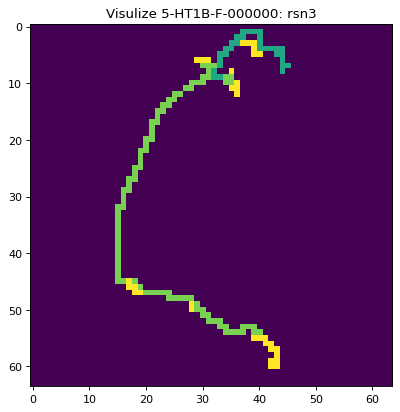

In [3]:
##############################################################################
# Code for 1.1
# 
##############################################################################
# Please code in this cell

import pickle

with open('/kaggle/input/phys591000-2022-week12-1/fc_data/5-HT1B-F-000000.pkl', 'rb') as f:
    data = pickle.load(f)

    
import matplotlib.pyplot as plt 

for i in list(data.keys()):
    for j in range(3):
        fig = plt.figure(figsize=(6,6), dpi=80)
        plt.title('Visulize 5-HT1B-F-000000: '+i+str(j+1))
        plt.imshow(data[i][j,:,:])
        plt.show()
    
###########################################################################

### 1.2 Load Data and preprocessing  
* Load all the data in the dataset.  
* Pick up figure 1(index 1) in `unit` weight in each file.   
* Print out the data structure.  
* Flatten the data.  
* Print out the data structure again.  

In [4]:
##############################################################################
# Code for 1.2
# 
##############################################################################
# Please code in this cell
dataset_ = np.zeros((64,64,))

for filename in os.listdir('/kaggle/input/phys591000-2022-week12-1/fc_data'):
    
    with open('/kaggle/input/phys591000-2022-week12-1/fc_data/'+filename, 'rb') as f:
        data = pickle.load(f)
        
    dataset_ = np.dstack([dataset_, data['unit'][1,:,:]])
    
dataset = np.delete(dataset_, [0], 2)
print(f"The data shape after pick up is: {dataset.shape}")

reshape_data = dataset.reshape(4096,5000)
print(f"The data shape after flatten() is: {reshape_data.shape}")
    
##############################################################################

The data shape after pick up is: (64, 64, 5000)
The data shape after flatten() is: (4096, 5000)


### 1.3 Build the Encoder   
* Build up layers
    * example of layer: tf.keras.layers.InputLayer
        --> tf.keras.layers.Dense  
    * Total 4 layers: input 4096  
        --> dense(1024)  
        --> dense(512)  
        --> dense(256)  
        --> output dense(64)  
    * The activation function should use `relu`.  
* Please visualize or print your Architecture.   

In [103]:
##############################################################################
# Code for 1.3
# 
##############################################################################
# Please code in this cell

# Import all layers!
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

def encoder():
    encoder_input = keras.Input(shape=(4096,))
    x = layers.Dense(1024, activation='relu')(encoder_input)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)

    return Model(inputs = encoder_input, outputs = x)

encoder().summary()

##############################################################################

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 4096)]            0         
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              4195328   
_________________________________________________________________
dense_33 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_35 (Dense)             (None, 64)                16448     
Total params: 4,867,904
Trainable params: 4,867,904
Non-trainable params: 0
_________________________________________________________________


### 1.4 Build the Decoder   
* Build up layers
    * example of layer: tf.keras.layers.InputLayer
        --> tf.keras.layers.Dense  
    * Total 4 layers: input 64  
        --> dense(256)  
        --> dense(512)  
        --> dense(1024)  
        --> output dense(4096)  
    * The activation function should use `relu`.  
    * The output layer should use `sigmoid` to be activation function.  
* Please visualize or print your Architecture.   

In [104]:
##############################################################################
# Code for 1.4
# 
##############################################################################
# Please code in this cell

# Decoder
def decoder():
    decoder_input = keras.Input(shape=(64,))
    x = layers.Dense(256, activation='relu')(decoder_input)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dense(4096, activation='sigmoid')(x)
    
    return Model(inputs = decoder_input, outputs = x)

decoder().summary()

##############################################################################

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 64)]              0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_37 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_38 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_39 (Dense)             (None, 4096)              4198400   
Total params: 4,871,936
Trainable params: 4,871,936
Non-trainable params: 0
_________________________________________________________________


### 1.5 Build up a full AE Model  
* Combine the encoder and decoder.  
* Please visualize or print your Architecture.   

In [105]:
##############################################################################
# Code for 1.5
# 
##############################################################################
# Please code in this cell

inputshape = keras.Input(shape=(4096,))
autoencoder = Model(inputshape, decoder()(encoder()(inputshape)))
autoencoder.summary()

##############################################################################

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 4096)]            0         
_________________________________________________________________
model_13 (Functional)        (None, 64)                4867904   
_________________________________________________________________
model_12 (Functional)        (None, 4096)              4871936   
Total params: 9,739,840
Trainable params: 9,739,840
Non-trainable params: 0
_________________________________________________________________


### 1.6 Training  
* Split the data to training data and testing data by `train_test_split`.
    * test_size = 0.2  
* `Adam` will be the optimizer (lr = 0.001) and `binary_crossentropy` will be the loss function.  
* Please train your RNN model with `batch_size=16` and `epochs=100`.
    * x = training data,  
    * y = training data,  
    * validation_data = (testing data,testing data)  

In [106]:
##############################################################################
# Code for 1.6
# 
##############################################################################
# Please code in this cell

# import the function:train_test_split
from sklearn.model_selection import train_test_split
from tensorflow import keras

# split X and Y into training set and test set for 20% test set
X_train, X_test = train_test_split(((reshape_data.transpose()+1)/2),
                                   test_size=0.2)

autoencoder.compile(optimizer=keras.optimizers.Adam(),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
history  = autoencoder.fit(X_train, X_train,
                           validation_data=(X_test,X_test),
                           epochs=100, batch_size=16,
                           verbose=0)

autoencoder.save("AutoEncoder.h5")
##############################################################################


### 1.7 Plot the learning curve  
* Plot the loss curve.  
* Plot the accuracy curve.  

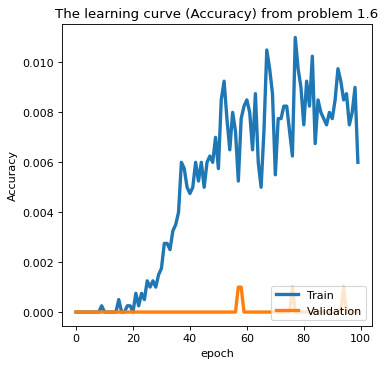

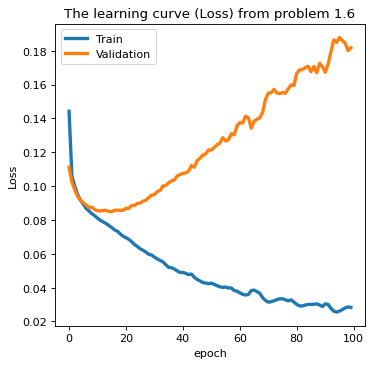

In [107]:
##############################################################################
# Code for 1.7
# 
##############################################################################
# Please code in this cell

fig = plt.figure(figsize=(5,5), dpi=80)
plt.title("The learning curve (Accuracy) from problem 1.6")
plt.plot(history.history['accuracy'], lw=3, label='Train')
plt.plot(history.history['val_accuracy'], lw=3, label='Validation')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


fig = plt.figure(figsize=(5,5), dpi=80)
plt.title("The learning curve (Loss) from problem 1.6")
plt.plot(history.history['loss'], lw=3, label='Train')
plt.plot(history.history['val_loss'], lw=3, label='Validation')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

##############################################################################

### 1.8 Visualize the result  
* Show 2 figures of test data.  
    * Each figure should include original image, dimensionality reduction image and prediction image.  

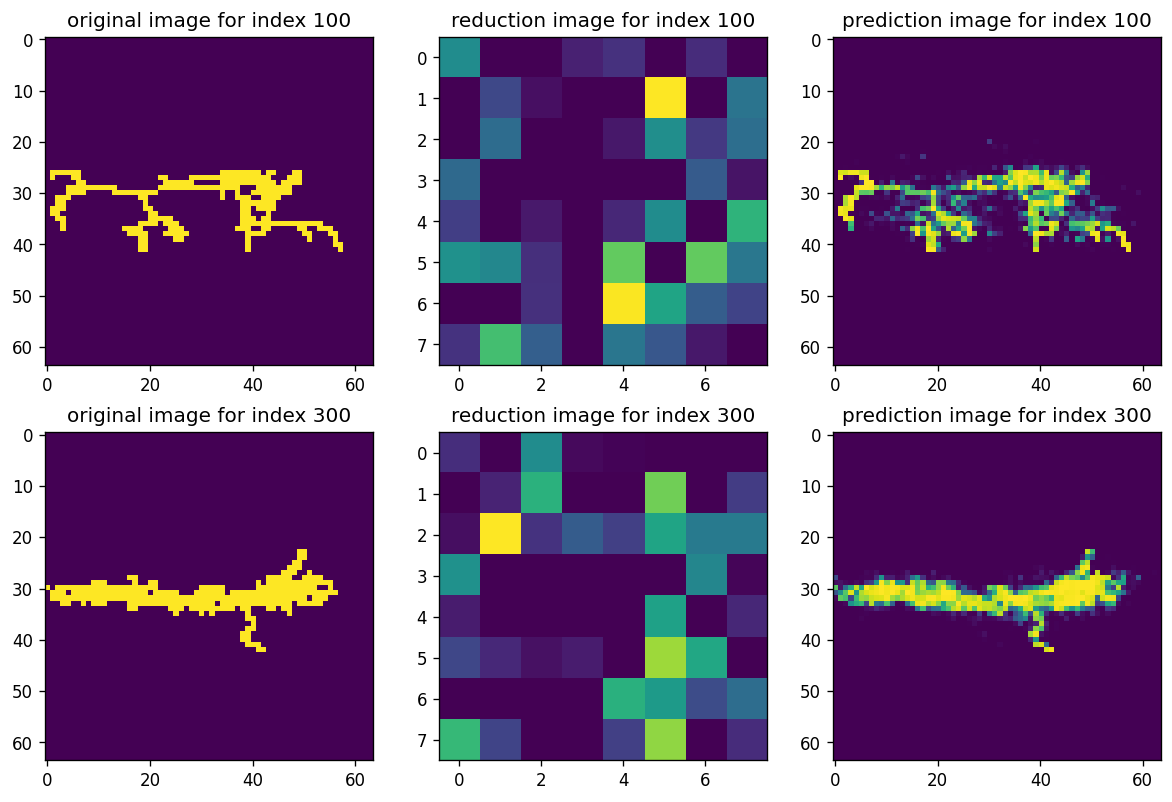

In [112]:
##############################################################################
# Code for 1.8
# 
##############################################################################
# Please code in this cell

prediction = autoencoder.predict((dataset[:,:].reshape(4096,5000).transpose()+1)/2)
reduction  = encoder().predict((dataset[:,:].reshape(4096,5000).transpose()+1)/2)

fig = plt.figure(figsize=(12,8), dpi=120)
plt.subplot(231)
plt.title("original image for index 100")
plt.imshow(dataset[:,:,100])

plt.subplot(232)
plt.title("reduction image for index 100")
plt.imshow(reduction[100].reshape(8,8))

plt.subplot(233)
plt.title("prediction image for index 100")
plt.imshow(prediction[100].reshape(64,64))


plt.subplot(234)
plt.title("original image for index 300")
plt.imshow(dataset[:,:,300])

plt.subplot(235)
plt.title("reduction image for index 300")
plt.imshow(reduction[300].reshape(8,8))

plt.subplot(236)
plt.title("prediction image for index 300")
plt.imshow(prediction[300].reshape(64,64))

plt.show()

##############################################################################

### 1.9
Discussion for 1.7-1.8

According to the accuracy curve, loss curve and the prediction images, please try your best to commnet on the performance of model.

---
Please write your discussion in this cell:     


From the accuracy and loss curve, we can see that the autoencoder model in 1.5 cell become overfitting during the training process.<br>
The overfitting result can be also seen in the prediction image. The model prediction image almost cover the original image, but it's too similar to let the model become overfit.<br>
In this case, the model loss the feature when doing fitting, instead of enlarging the feature when doing encode, which is the main goal of using autoencoder structure.

### Bonus  
* Optimize model.  
* Visulize the results.  
* Describe the performance comparation.  

Model: "model_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_88 (InputLayer)        [(None, 64, 64)]          0         
_________________________________________________________________
model_80 (Functional)        (None, 8, 8, 8)           1904      
_________________________________________________________________
model_79 (Functional)        (None, 64, 64, 1)         2481      
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


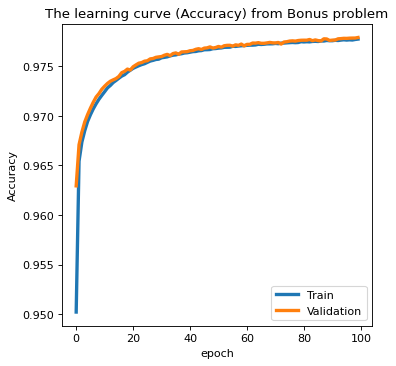

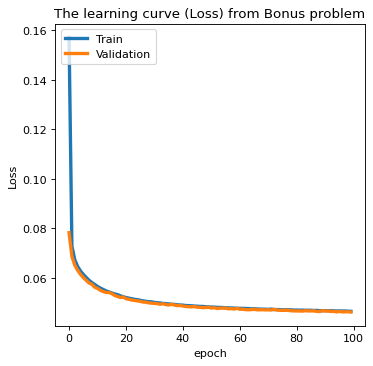

In [238]:
##############################################################################
# Code for bonus
# 
##############################################################################
# Please code in this cell

import keras
from keras import layers

# encoder
def encoder():
    encoder_input = keras.Input(shape=(64, 64, 1))
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoder_input)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    return Model(inputs = encoder_input, outputs = x)

# decoder
def decoder():
    decoder_input = keras.Input(shape=(8, 8, 8))
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(decoder_input)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    return Model(inputs = decoder_input, outputs = x)


# compile
inputshape = keras.Input(shape=(64, 64,))
autoencoder_2 = Model(inputshape, decoder()(encoder()(inputshape)))
autoencoder_2.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder_2.summary()

# data process
dataset_change = np.swapaxes(dataset, 0, 2)
dataset_change = np.swapaxes(dataset_change, 1, 2)

X_train, X_test = train_test_split((dataset_change+1)/2,
                                   test_size=0.2)

# Train it by providing training images
history_2 = autoencoder_2.fit(X_train, X_train,
                              validation_data=(X_test,X_test),
                              epochs=100,
                              batch_size=16,
                              verbose=0)

autoencoder_2.save("model_2_save.h5")


# plot
fig = plt.figure(figsize=(5,5), dpi=80)
plt.title("The learning curve (Accuracy) from Bonus problem")
plt.plot(history_2.history['accuracy'], lw=3, label='Train')
plt.plot(history_2.history['val_accuracy'], lw=3, label='Validation')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


fig = plt.figure(figsize=(5,5), dpi=80)
plt.title("The learning curve (Loss) from Bonus problem")
plt.plot(history_2.history['loss'], lw=3, label='Train')
plt.plot(history_2.history['val_loss'], lw=3, label='Validation')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

##############################################################################

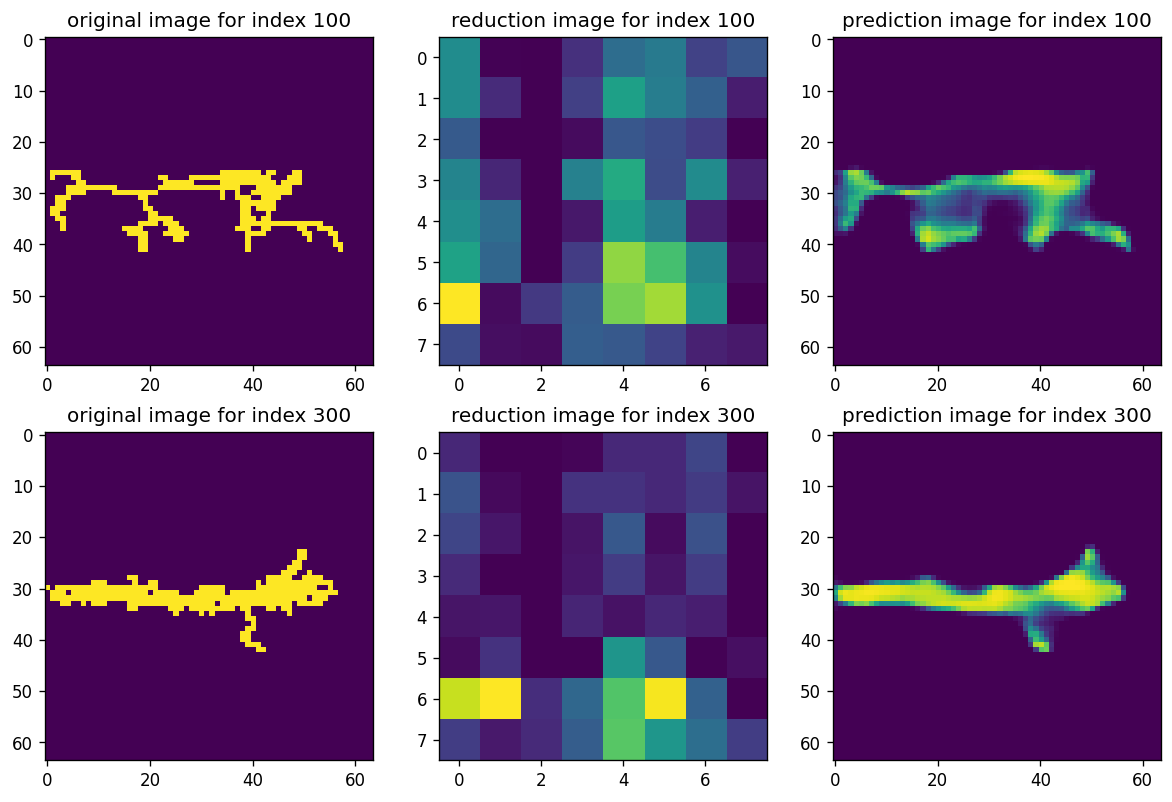

In [246]:
prediction_2 = autoencoder_2.predict((dataset_change+1)/2)

plt.subplot(221)
plt.title("original image for index 100")
plt.imshow(dataset[:,:,100])

plt.subplot(222)
plt.title("prediction image for index 100")
plt.imshow(prediction_2[100,:,:])


plt.subplot(223)
plt.title("original image for index 300")
plt.imshow(dataset[:,:,300])

plt.subplot(224)
plt.title("prediction image for index 300")
plt.imshow(prediction_2[300,:,:])

plt.show()


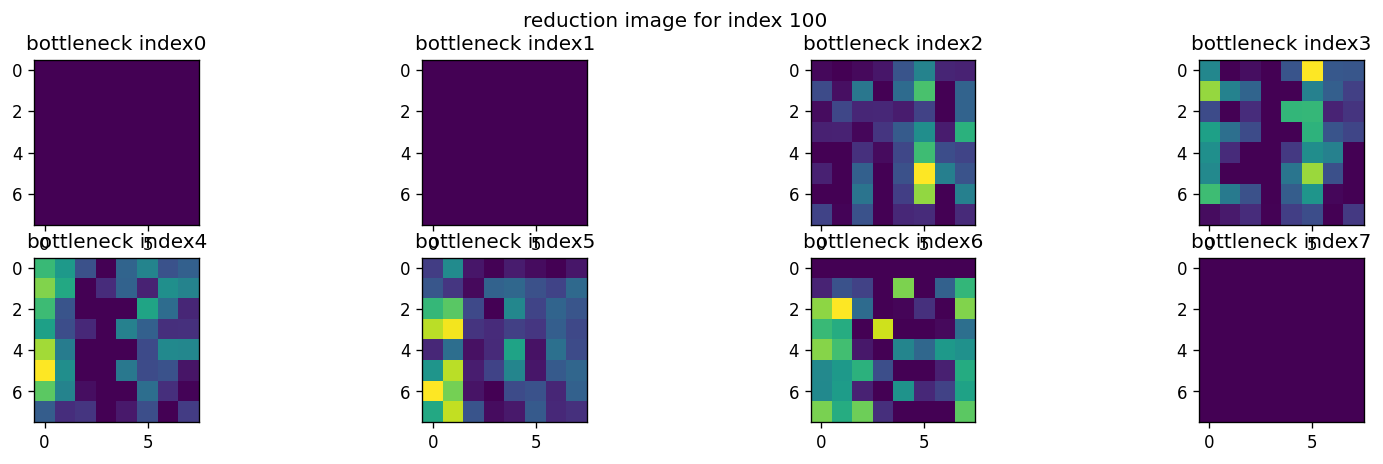

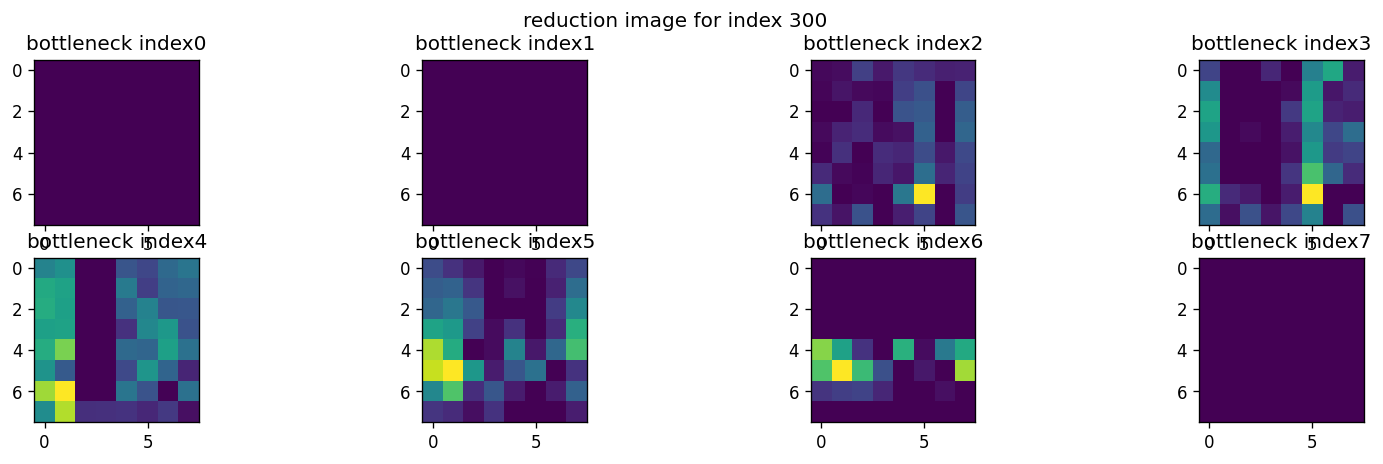

In [251]:
reduction_2  = encoder().predict((dataset_change+1)/2)


fig = plt.figure(figsize=(16,4), dpi=120)
fig.suptitle("reduction image for index 100")
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.title(f"bottleneck index{i}")
    plt.imshow(reduction_2[100,i,:,:])
plt.show()

fig = plt.figure(figsize=(16,4), dpi=120)
fig.suptitle("reduction image for index 300")
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.title(f"bottleneck index{i}")
    plt.imshow(reduction_2[300,i,:,:])
plt.show()

Discussion for bonus

Describe the comparation of the optimization and explain how you did it and why you did it.  

---
Please write your discussion in this cell:     


From the accuracy and loss curve, we can see using 2D-CNN method to build the autoencoder model can have a much better acurracy.<br>
The main reaon why I chose this method is beacause I want to optimize the autoencoder structure by letting CNN model doing the picture learning(which is good at CNN). After CNN learning, I let autoencoder structure help CNN model to enlarge those features, and then let CNN model in the deeper layer to pick features to do further picture learning.